# Importer les packages nécessaires 

In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Importer la base de données Iris

In [2]:
# Importation du data
data = pd.read_csv('Iris2.csv')
# Eliminer la colonnes des indices ajoutés par défaut
data.drop('Id',axis=1,inplace=True)
# Affichage de la taille du data
print(data.shape)
# Affichage de l'entête du data 
data.head()

(150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Extraire les valeurs du data et les tracer

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

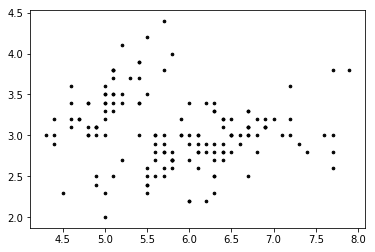

In [3]:
# Getting the values and plotting it
f1 = data['SepalLengthCm'].values
f2 = data['SepalWidthCm'].values
f3 = data['PetalLengthCm'].values
f4 = data['PetalWidthCm'].values
X = np.array(list(zip(f1, f2, f3, f4)))
print(X)
plt.scatter(f1, f2, c='black', s=7)

# Fonction pour calculer la distance euclidean

In [4]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Initialisation des variables

In [5]:
# Nombre de classes
k = 2
# Taille du matrice qui contient les valeurs du data
c = X.shape[1]
n = X.shape[0]
# Variable pour dire si le nombre de classes est fixé ou non
fixed_no_of_clusters= False    

# Fonction pour générer aléatoirement les k centres initiaux

In [6]:
def generation_centre_clusters(k):
    C = np.random.randn(k,c)
    for i in range(k):
        C[i]=X[np.random.randint(0,n-1)]
    return(C)
C=generation_centre_clusters(k)

# Tracer les centres initiaux

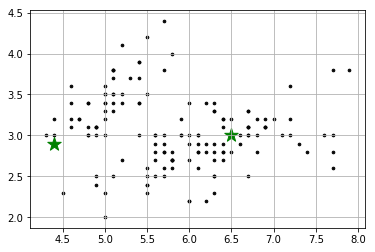

In [7]:
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C[:,0], C[:,1], marker='*', s=200, c='g')

plt.grid(True)
plt.show()

# Appliquation du kmeans

In [8]:
def initialisation_old_new_centers():
    # Pour stocker les valeurs des centres qu'on ils sont modifiés
    C_old = np.zeros(C.shape)
    return(C_old)
# Labels des classes(0, 1, 2)
clusters = np.zeros(len(X))
# Fonction d'erreur - La distance entre les nouveaux et les anciens centres
def kmeans():
    C_old=initialisation_old_new_centers()
    error = dist(C, C_old, None)
    # Boucler jusqu'à ce que l'erreur devient zero
    while error != 0:
        # Assigner chaque valeur à la classe la plus proche à elle
        for i in range(len(X)):
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # Stocker l'ancienne valeur des centres
        C_old = deepcopy(C)
        # Trouver le nouveau centre en se basant sur la moyenne
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)
    return(C,clusters)
C,clusters=kmeans()

# Affichage des centres et les classes

In [9]:
print(C)
print(clusters)

[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36037736 1.56226415 0.28867925]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


# Tracer les centres 

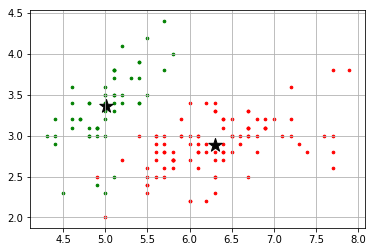

In [10]:
colors = ['r', 'g', 'b']
labels=['setosa','versicolor','virginica']
recs = []
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

plt.grid(True)
plt.show()

# Initialisation de intra et inter distance

In [11]:
def initialisation_intra_inter_distance():
    old_intra_cluster_distance=0
    new_intra_cluster_distance = deepcopy(old_intra_cluster_distance)

    max1=0
    max2=0

    distances = np.zeros((n,n))
    for i in range(n):
        distances[:,i] = np.linalg.norm(X - X[i], axis=1)
    for i in range(n):
        for j in range(n):
            max1=distances[i][j]
            if max1>max2:
                max2=max1
        
    old_inter_cluster_distance=max2 # to store old centers
    new_inter_cluster_distance = deepcopy(old_inter_cluster_distance)
    return(old_inter_cluster_distance,new_inter_cluster_distance,old_intra_cluster_distance,new_intra_cluster_distance)

old_inter_cluster_distance=initialisation_intra_inter_distance()[0]
new_inter_cluster_distance=initialisation_intra_inter_distance()[1]
old_intra_cluster_distance=initialisation_intra_inter_distance()[2]
new_intra_cluster_distance=initialisation_intra_inter_distance()[3]
print(old_inter_cluster_distance)
print(new_inter_cluster_distance)
print(old_intra_cluster_distance)
print(new_intra_cluster_distance)

7.085195833567341
7.085195833567341
0
0


# Calcule de inter distance

In [12]:
import math
def valeur(k):
        cpt=0
        for i in range (k):
            cpt=cpt+i
        return(cpt)
def calcul_inter_distance():
    coef=np.zeros(valeur(k))
    cpt=0
    for i in range (k-1):
        for j in range(i+1,k):
            coef[cpt]=np.linalg.norm(C[i]-C[j])
            cpt+=1
    print(coef)
    inter_distance=min(coef)
    return(inter_distance)
new_inter_cluster_distance=calcul_inter_distance()
print(new_inter_cluster_distance)

[3.9266855]
3.926685495730057


# Calcule de intra distance

In [13]:
def calcul_intra_distance():
    valeur=np.zeros(n)
    indice=0
    for i in range (n):
        indice=clusters[i]
        valeur[i]=np.linalg.norm(X[i]-C[int(indice)])
    intra_class=np.mean(valeur, axis=0)
    return(intra_class)
new_intra_cluster_distance=calcul_intra_distance()
print(new_intra_cluster_distance)

0.8560279682448629


# Application kmeans modifié

In [14]:
erreur=new_intra_cluster_distance > old_intra_cluster_distance and new_inter_cluster_distance < old_inter_cluster_distance
while erreur==True :
    k=k+1
    C=generation_centre_clusters(k)
    C,clusters=kmeans()
    old_intra_cluster_distance = deepcopy(new_intra_cluster_distance)
    old_inter_cluster_distance = deepcopy(new_inter_cluster_distance)
    if fixed_no_of_clusters == False: 
        new_inter_cluster_distance=calcul_inter_distance()
        new_intra_cluster_distance=calcul_intra_distance()    
    erreur=new_intra_cluster_distance > old_intra_cluster_distance and new_inter_cluster_distance < old_inter_cluster_distance
print(k)
print(C)

[3.34641646 1.78842354 4.98805404]
3
[[5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.418      1.464      0.244     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


# Tracer les centres finaux et leurs classes

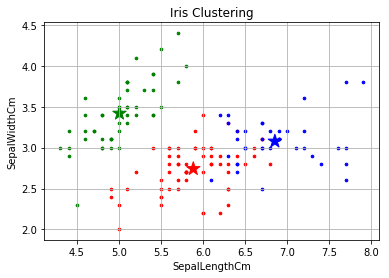

In [17]:
colors = ['r', 'g', 'b']
labels=['setosa','versicolor','virginica']
recs = []
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c=colors)

plt.grid(True)
plt.title('Iris Clustering')

plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()